In [2]:
!pip install umap
!pip install umap-learn

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=e01cb131f1e2fbce7594cad9b75dd6c04678509df34ae781e5d63248c251a722
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=7a806c96ea3de89187a2f86460d58a944d032fb3cbd390b2b26801ca569da250
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap
from pandas.plotting import parallel_coordinates

In [4]:
df = pd.read_csv('train.csv')
df = df.set_index('id')

In [ ]:
df.shape

(101763, 22)

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [5]:
df.skew()

loc                  11.818912
v(g)                 14.258631
ev(g)                 6.513498
iv(g)                28.209964
n                     9.908514
v                    15.959869
l                     1.903337
d                     5.618081
i                     4.859743
e                    47.676446
b                    16.016099
t                    46.363403
lOCode               15.961574
lOComment            12.086854
lOBlank               8.717378
locCodeAndComment    11.108580
uniq_Op               5.638689
uniq_Opnd            13.504999
total_Op             11.149996
total_Opnd           10.496121
branchCount           8.568527
defects               1.305878
dtype: float64

In [6]:
df.mode().iloc[0]

loc                   11.0
v(g)                   2.0
ev(g)                  1.0
iv(g)                  2.0
n                      0.0
v                      0.0
l                      0.0
d                      0.0
i                      0.0
e                      0.0
b                      0.0
t                      0.0
lOCode                   0
lOComment                0
lOBlank                  0
locCodeAndComment        0
uniq_Op                0.0
uniq_Opnd              0.0
total_Op               0.0
total_Opnd             0.0
branchCount            3.0
defects              False
Name: 0, dtype: object

In [7]:
df.mean()

loc                     37.347160
v(g)                     5.492684
ev(g)                    2.845022
iv(g)                    3.498826
n                       96.655995
v                      538.280956
l                        0.111634
d                       13.681881
i                       27.573007
e                    20853.589876
b                        0.179164
t                     1141.357982
lOCode                  22.802453
lOComment                1.773945
lOBlank                  3.979865
locCodeAndComment        0.196604
uniq_Op                 11.896131
uniq_Opnd               15.596671
total_Op                57.628116
total_Opnd              39.249698
branchCount              9.839549
defects                  0.226644
dtype: float64

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.hist(bins=20, figsize=(25, 15))
plt.show()

df.plot(kind='box', subplots=True, layout=(4,6), figsize=(25, 15))
plt.show()

In [ ]:
sns.countplot(x='defects', data=df)
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
pca = PCA().fit(scaled_data)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
X, y = df.drop('defects', axis=1), df['defects']

In [ ]:
import pandas as pd

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# Basic statistics
print("\nBasic Statistics:")

# Mean
print("\nMean:")
print(df.mean())

# Median
print("\nMedian:")
print(df.median())

# Mode
print("\nMode:")
print(df.mode().iloc[0])

# Standard Deviation
print("\nStandard Deviation:")
print(df.std())

# Additional statistics like min, max can also be added similarly
print("\nMinimum:")
print(df.min())

print("\nMaximum:")
print(df.max())


In [ ]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=250)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y)
plt.title('t-SNE of Dataset')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


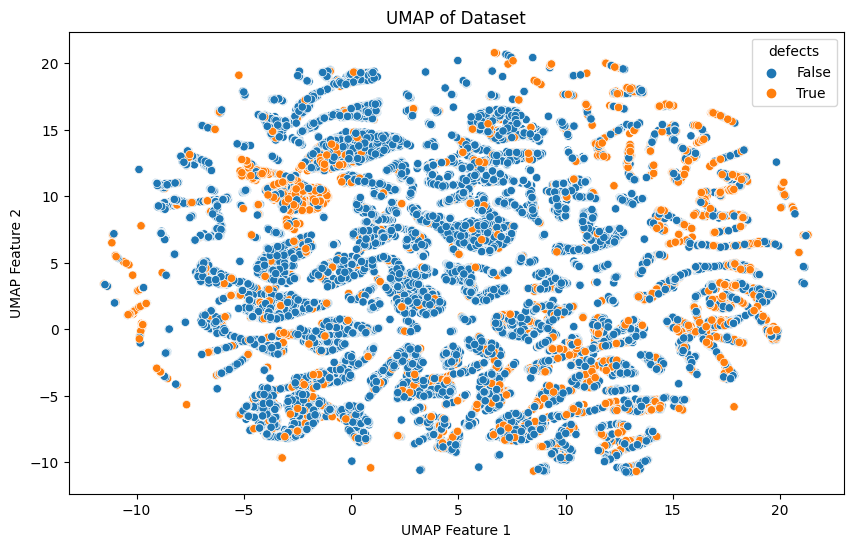

In [ ]:
umap_model = umap.UMAP()
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y)
plt.title('UMAP of Dataset')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
parallel_coordinates(df, 'defects', colormap=plt.get_cmap("Set1"))
plt.title('Parallel Coordinates Plot')
plt.show()